### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning and Wrangling 
#### 3. Data prep for regression analysis 
#### 4. Regression analysis
#### 5. Exporting the data

### 1. Import data and libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
path = r'C:\Users\tee3a\3D Objects\Project 6'
df_airline = pd.read_csv(os.path.join(path, '02 Data','Prepared Data for storing any manipulated data sets', 'flavors_of_cacao_visuals.csv'), index_col = False)

##### This command propts matplotlib visuals to appear in the notebook

In [60]:
%matplotlib inline

#### 2. Data cleaning and Wrangling 

In [61]:
df4 = df_airline.drop(columns = ['Unnamed: 0'])

In [62]:
df4.head(1)

,Company Maker,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Rating category
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,xao,Sao Tome,Middle rating


In [63]:
# identifying the rows with missing values
df4.isnull().sum()

Company Maker                       0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           0
Broad Bean Origin                   1
Rating category                     0
dtype: int64

In [64]:
df4_nan =  df4[df4['Broad Bean Origin'].isnull() == True]
df4_nan

,Company Maker,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Rating category
1787,Zotter,"Indianer, Raw",883,2012,58.0,Austria,3.5,xao,NaN,Middle rating


In [65]:
# create a new dataframe to clean products
df4_clean = df4_clean[df4_clean['Broad Bean Origin'].isnull() == False]
df4_clean.isnull().sum()

Company Maker                       0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           0
Broad Bean Origin                   0
Rating category                     0
dtype: int64

#### 3. Data prep for regression analysis 

In [66]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company Maker                     1793 non-null   object 
 1   Specific Bean Origin or Bar Name  1793 non-null   object 
 2   REF                               1793 non-null   int64  
 3   Review Date                       1793 non-null   int64  
 4   Cocoa Percent                     1793 non-null   float64
 5   Company Location                  1793 non-null   object 
 6   Rating                            1793 non-null   float64
 7   Bean Type                         1793 non-null   object 
 8   Broad Bean Origin                 1792 non-null   object 
 9   Rating category                   1793 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 140.2+ KB


##### Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

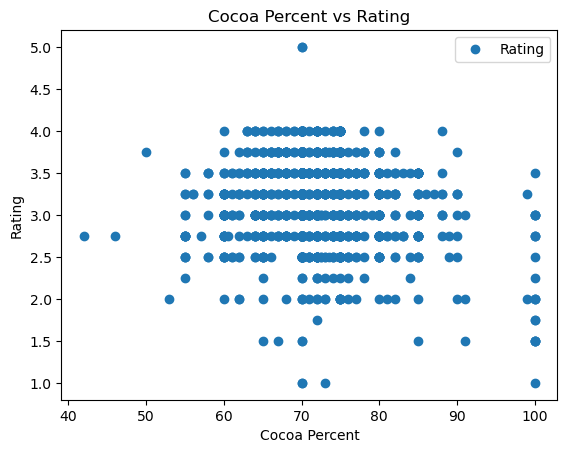

In [67]:
df4.plot(x = 'Cocoa Percent', y='Rating',style='o')
plt.title('Cocoa Percent vs Rating') 
plt.xlabel('Cocoa Percent')  
plt.ylabel('Rating')
plt.show()

#####  Reshape the variables into NumPy arrays and put them into separate objects.

In [68]:
X = df4['Cocoa Percent'].values.reshape(-1,1)
y = df4['Rating'].values.reshape(-1,1)

In [69]:
X

array([[63.],
       [70.],
       [70.],
       ...,
       [65.],
       [62.],
       [65.]])

In [70]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

##### Split data into a training set and a test set

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

#### Create a regression object

In [72]:
regression = LinearRegression()

In [73]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

#### Fit the regression object onto the training set

In [74]:
regression.fit(X_train, y_train)

LinearRegression()

#### Predict the values of y using X
#### Create a plot that shows the regression line from the model on the test set

In [75]:
y_predicted = regression.predict(X_test)

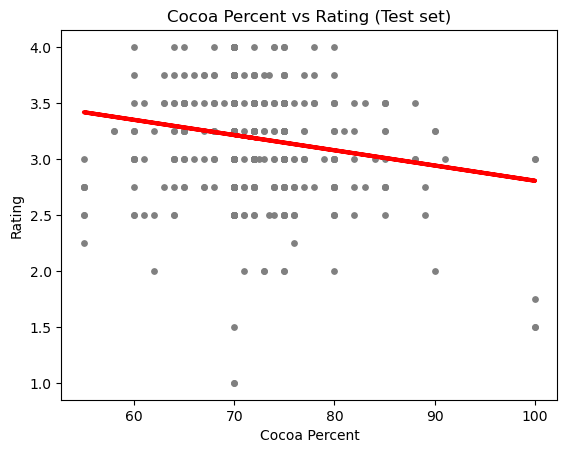

In [76]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

#### Create objects that contain the model summary statistics

In [77]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

#### Print the model summary statistics. This is where you evaluate the performance of the model

In [78]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01359092]]
Mean squared error:  0.22104174794163592
R2 score:  0.013527618100036332


#### The models outcome on the training set is very similar to that on the test set.  With the MSE being even larger on the train set.  Confirming that this is not a good model to use.  This proves that the Cocoa Percent are not the driving factor of chocolate Ratings. There might be other variables contributing to the chocolate Ratings apart from the Cocoa percent in each chocolate.

#### Create a dataframe comparing the actual and predicted values of y

In [79]:
y_predicted

array([[3.21301331],
       [3.14505871],
       [3.18583147],
       [3.21301331],
       [3.21301331],
       [3.14505871],
       [3.14505871],
       [3.18583147],
       [3.14505871],
       [3.21301331],
       [3.24019515],
       [3.14505871],
       [2.94119493],
       [3.21301331],
       [3.2809679 ],
       [3.21301331],
       [3.21301331],
       [3.21301331],
       [3.18583147],
       [3.18583147],
       [3.4168771 ],
       [3.21301331],
       [3.29455882],
       [3.11787688],
       [3.33533158],
       [3.03633136],
       [3.14505871],
       [3.21301331],
       [3.21301331],
       [3.2809679 ],
       [3.24019515],
       [3.21301331],
       [3.13146779],
       [3.21301331],
       [3.14505871],
       [3.3489225 ],
       [3.21301331],
       [3.19942239],
       [3.21301331],
       [3.21301331],
       [3.13146779],
       [3.07710412],
       [3.18583147],
       [3.17224055],
       [3.07710412],
       [3.14505871],
       [3.21301331],
       [3.213

In [80]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.25,3.213013
1,3.25,3.145059
2,3.00,3.185831
3,3.25,3.213013
4,2.50,3.213013
5,2.75,3.145059
6,3.50,3.145059
7,3.75,3.185831
8,2.75,3.145059
9,3.25,3.213013


##### Compare how the regression fits the training set

#### Predict

In [81]:
y_predicted_train = regression.predict(X_train) ## This is predicting X_train

In [82]:
rmse = mean_squared_error(y_train, y_predicted_train) 
r2 = r2_score(y_train, y_predicted_train)

In [83]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01359092]]
Mean squared error:  0.22215728569470164
R2 score:  0.03197903267614899


#### The models' outcome on the training set is similar to that of the one we have in the test set. Even more, the data points are more separated here than in the other set. This confirms that the model is not applicable either.

#### Visualizing the training set results

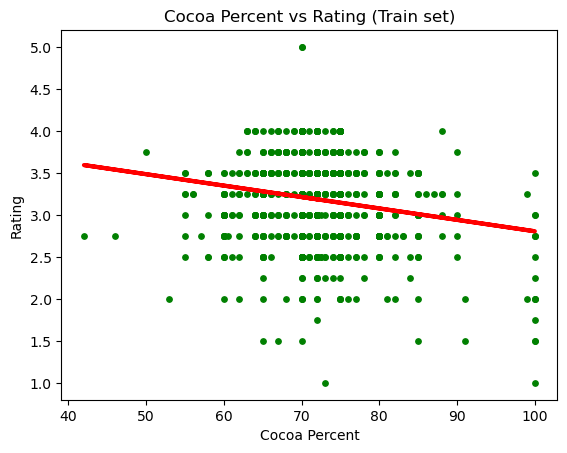

In [84]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Train set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

#### We are not able to affirm that Cocoa Percent affects chcolate Ratings. It's possible that we need to have more data points or more source data in order to make better assumpions.

#### 5. Exporting the data

In [85]:
df4.to_pickle(os.path.join(path, 'flavors_of_cacao_regresion.pkl'))